<a href="https://colab.research.google.com/github/arocavanaclocha/public/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

In [1]:
!git clone https://github.com/arocavanaclocha/public.git
!python /content/public/core/ui.py
!python /content/public/core/db.py

Cloning into 'public'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 50 (delta 20), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), done.


In [21]:
try:  
  import os
  import pandas as pd
  import numpy as np

  import public.core.ui as UI
  import public.core.db as DB

except ModuleNotFoundError as m_error:
    print(str(m_error))
    print('please install the required module and try again...')
    input('press enter to exit....')
    exit()


ROOT_PATH="/content/drive/MyDrive/root/"  #@param {type:"string"}
#   scraps_path    = os.path.join(sys.path[0], 'scraps')
DB_NAME = "db_prods_history"#@param {type:"string"}

db_file_path = os.path.join(ROOT_PATH, 'dbs', DB_NAME+'.csv')
db = DB.load_database( db_file_path )

del_columns = [col for col in db if 'Unnamed' in col]
db.drop(columns=del_columns, inplace=True)


----------------------------
Loading database file:
    > file: /content/drive/MyDrive/root/dbs/db_prods_history.csv


# Snapshot

In [3]:
scrap__spider_date = "2021-11-06" #@param {type:"date"}
scrap__spider_marketplace = "hornbach" #@param ["hornbach"]
scrap__spider_country = "de" #@param ["de","cz"]
category  = "Bathroom mirror" #@param ["Bathroom lighting","Bathroom mirror", "Cosmetic mirror", "Mirror cabinet"] 

db_snapshot =db[db['scrap__spider_date']==scrap__spider_date]




In [4]:
UI.info(db_snapshot[(db_snapshot['category']==category) &
                 (db_snapshot['scrap__spider_marketplace']==scrap__spider_marketplace) & 
                 (db_snapshot['scrap__spider_country']==scrap__spider_country)], 
     title="SUMMARY FOR CATEGORY: " + category)

-------------SUMMARY FOR CATEGORY: Bathroom mirror-------------
Spider: hornbach.de, version 1.0
    Delta:  0:53:53, 
    Start:  2021-11-06 09:40:58
    Finish:  2021-11-06 10:34:51
    
    CURRENCY:  €

Quantity of SKU's:  280

-------------PRICES-------------
Min            = 5.9
Quantile [0,25]= 54.7
Quantile [0,50]= 149.0
Mean           = 266.4912142857145
Quantile [0,75]= 260.5
Max            = 1610.07

------------- SUMMARY OF MIN/MAX PRICE PRODUCT-------------
Cheapest:          Kristallspiegel Eckig 40 x 30 cm
                   https://www.hornbach.de/shop/Kristallspiegel-Eckig-40-x-30-cm/6083022/artikel.html
Most expensive:    Standspiegel Bette Lux Shape schwarz 190x60 cm Eiche natur Q050-815FH814
                   https://www.hornbach.de/shop/Standspiegel-Bette-Lux-Shape-schwarz-190x60-cm-Eiche-natur-Q050-815FH814/6707615/artikel.html

-------------REVIEWS-------------
Min            = 1.0
Quantile [0,25]= 3.88
Quantile [0,50]= 4.75
Mean           = 4.08
Quantile [0,75]

## Cleaning verification

In [5]:
#%matplotlib inline
#UI.missing_data_heatmap(db_snapshot)
#UI.missing_data_perc_list(db_snapshot)
#UI.show_col_hist(db_snapshot, col_name="price")
#UI.msno.heatmap(db_snapshot)
#UI.msno.heatmap(db_snapshot)
#UI.msno.dendrogram(df_scrap)
#UI.msno.matrix(df_scrap)
#UI.msno.bar(db_snapshot)

## Product data Intelligence

In [9]:
print("Available SKU's by category and brand for each marketplace and country.")

table = pd.pivot_table(db_snapshot, 
                        values=['sku'], index=[ 'category'],
                        columns=[ 'scrap__spider_marketplace', 'scrap__spider_country' ], 
                        aggfunc={  'sku': 'count' }, fill_value=0, margins=True
                        )
table

Available SKU's by category and brand for each marketplace and country.


sku                                     
scrap__spider_marketplace hornbach                                  All
scrap__spider_country           at   cz    de   nl   ro   se   sk      
category                                                               
Bathroom lighting                0    0   165    0    4   33    0   202
Bathroom mirror                240  327   280  145   72  106  293  1463
Cosmetic mirror                 71   25    76    0    5    0   35   212
Mirror cabinet                 856   99   994  146   59   73   95  2322
All                           1167  451  1515  291  140  212  423  4199

In [10]:
print(scrap__spider_marketplace + "." + scrap__spider_country + " >> " + category)
UI.tablesummary_by_sku(db_snapshot[(db_snapshot['category']==category) &
                 (db_snapshot['scrap__spider_marketplace']==scrap__spider_marketplace) & 
                 (db_snapshot['scrap__spider_country']==scrap__spider_country)], groupby='brand') 


hornbach.de >> Bathroom mirror


,sku_sum,sku_%
brand,,
Baden Haus,46,16.849817
Kristall Form,42,15.384615
FACKELMANN,29,10.622711
Pelipal,28,10.256410
DSK,25,9.157509
BETTE,18,6.593407
Allibert,15,5.494505
Sanox,13,4.761905
Jokey,10,3.663004


In [11]:
#& (db_snapshot['isAvailableInShop']==True)

In [12]:
db_snapshot['clickAndCollectState'].unique()

array(['DISABLED', 'AVAILABLE', 'OUT_OF_STOCK'], dtype=object)

In [13]:
import ast
for i, row in db_snapshot.iterrows():
  db_snapshot.at[i, 'img_url'] = ast.literal_eval(db_snapshot.at[i, 'img_urls'])[0]

In [14]:
db_snapshot.head(10)

,title,sku,product_type1,product_type2,isStoreBrand,product_url,product_pos_in_page,product_page,source_category_url,confs,isConfigurable,hasVariants,reviews_rating,reviews_count,currency,price,creation_date,seller,EAN,description,isAvailableInShop,isAvailableOnline,onlineShippingCost,onlineShippingLeadtime,clickCollectLeadtime,clickAndCollectState,clickAndCollectAvailableQuantity,deliveryTimeText,specialPrice,isSpecialPrice,brand,reviews,isHighlight,scrap__guid,scrap__maincategory_url,scrap__spider_country,scrap__spider_date_start,scrap__spider_date_end,scrap__spider_date,scrap__spider_marketplace,scrap__spider_name,scrap__spider_version,scrap__title,datasheet_urls,logoUrl,metaKeywords,nearby_markets,img_urls,breadcrumbs,description1,scrap__date_start,category,img_url
0,LED Badspiegel Tessin mit Kosmetikspiegel 100 ...,6233068,Spiegel,Lichtspiegel,False,https://www.hornbach.de/shop/LED-Badspiegel-Te...,2,1,https://www.hornbach.de/shop/Badmoebel/S1876/a...,[],False,False,4.0,11.0,€,419.0,2021-08-17,NaN,8003964450111,"Beleuchtung integriert, Mit Holz-Unterkonstruk...",False,True,19.0,ca. 1-2 Werktage,NaN,DISABLED,0.0,Lieferzeit ca. 3-4 Wochen,0.0,False,Baden Haus,"[{'review_date': '2021-8-17', 'review_heading'...",False,8cd4d2e1-7c4b-474a-8a93-ea71284f1f13,https://www.hornbach.de/cms/de/de/sortiment/ba...,de,2021-11-06 09:40:58,2021-11-06 10:34:51,2021-11-06,hornbach,hornbach_spider,1.0,Weekly scraping process,['https://cdn.hornbach.de/data/shop/D04/001/78...,https://cdn.hornbach.de/data/shop/D04/001/780/...,LED Badspiegel Tessin mit Kosmetikspiegel 100 ...,"[['Hornbach Bad Bergzabern', 'auf Bestellung i...",['https://cdn.hornbach.de/data/shop/D04/001/78...,"['Startseite', 'Sortiment', 'Bad & Sanitär', '...",NaN,2021-11-06 09:40:58,Bathroom mirror,https://cdn.hornbach.de/data/shop/D04/001/780/...
1,LED Badspiegel DSK Silver Boulevard 70x120 cm ...,5829502,Spiegel,Lichtspiegel,False,https://www.hornbach.de/shop/LED-Badspiegel-DS...,3,1,https://www.hornbach.de/shop/Badmoebel/S1876/a...,"[{'config': '120 x 70 cm', 'sku': '5829502'}, ...",False,False,4.5,2.0,€,309.0,2020-10-15,NaN,4250312102695,"Beleuchtung integriert, Mit Alurahmen",True,True,9.9,ca. 3 Werktage,in 2 Stunden,AVAILABLE,8.0,in 2 Stunden abholbereit,0.0,False,DSK,"[{'review_date': '2020-10-15', 'review_heading...",False,8cd4d2e1-7c4b-474a-8a93-ea71284f1f13,https://www.hornbach.de/cms/de/de/sortiment/ba...,de,2021-11-06 09:40:58,2021-11-06 10:34:51,2021-11-06,hornbach,hornbach_spider,1.0,Weekly scraping process,['https://cdn.hornbach.de/data/shop/D04/001/78...,https://cdn.hornbach.de/data/shop/D04/001/780/...,LED Badspiegel DSK Silver Boulevard 70x120 cm ...,"[['Hornbach Bad Bergzabern', 'auf Bestellung i...",['https://cdn.hornbach.de/data/shop/D04/001/78...,"['Startseite', 'Sortiment', 'Bad & Sanitär', '...",NaN,2021-11-06 09:40:58,Bathroom mirror,https://cdn.hornbach.de/data/shop/D04/001/780/...
2,LED Badspiegel Christal Juno 45x75 cm IP 20,6047316,Spiegel,Lichtspiegel,False,https://www.hornbach.de/shop/LED-Badspiegel-Ch...,5,1,https://www.hornbach.de/shop/Badmoebel/S1876/a...,[],False,False,4.0,3.0,€,99.0,2021-08-27,NaN,4250312102947,"Beleuchtung integriert, Mit Alurahmen",True,True,9.9,ca. 1-2 Werktage,in 2 Stunden,AVAILABLE,3.0,in 2 Stunden abholbereit,0.0,False,DSK,"[{'review_date': '2021-8-27', 'review_heading'...",False,8cd4d2e1-7c4b-474a-8a93-ea71284f1f13,https://www.hornbach.de/cms/de/de/sortiment/ba...,de,2021-11-06 09:40:58,2021-11-06 10:34:51,2021-11-06,hornbach,hornbach_spider,1.0,Weekly scraping process,['https://cdn.hornbach.de/data/shop/D04/001/78...,https://cdn.hornbach.de/data/shop/D04/001/780/...,LED Badspiegel Christal Juno 45x75 cm IP 20,"[['Hornbach Bad Bergzabern', 'auf Bestellung i...",['https://cdn.hornbach.de/data/shop/D04/001/78...,"['Startseite', 'Sortiment', 'Bad & Sanitär', '...",NaN,2021-11-06 09:40:58,Bathroom mirror,https://cdn.hornbach.de/data/shop/D04/001/780/...
3,"Kofferschrank FACKELMANN weiß 115x40,5x26 cm m...",6374385,Schrank,M

In [15]:
from IPython.display import HTML
def image_formatter(im):
  return f'<img src="{im}" height="100">'   

def link_formatter(link):
  return f'<a href="{link}">View Page.</a>'

best_choice = db_snapshot[(db_snapshot['category']==category) &
                     (db_snapshot['product_page']==1) &  (db_snapshot['reviews_count']>5) &
                  (db_snapshot['scrap__spider_marketplace']==scrap__spider_marketplace)  ][['sku', 'title', 'brand', 'isAvailableInShop', 'img_url', 'reviews_count', 'reviews_rating', 'product_url', 'source_category_url']]

HTML(best_choice.to_html(formatters={ 'img_url': image_formatter, 'source_category_url': link_formatter, 'product_url':link_formatter}, escape=False))

,sku,title,brand,isAvailableInShop,img_url,reviews_count,reviews_rating,product_url,source_category_url
0,6233068,LED Badspiegel Tessin mit Kosmetikspiegel 100 cm 45011 IP 44 (fremdkörper- und spritzwassergeschützt),Baden Haus,False,,11.0,4.0,View Page.,View Page.
12,6083036,Spiegelfliesen 15x15 cm 12 Stück,Jokey,True,,6.0,5.0,View Page.,View Page.
2806,8576759,Zrcadlo do koupelny Crystal 70x50 cm H,NaN,True,,23.0,5.0,View Page.,View Page.
3856,4678742,"Oglindă baie cu iluminare LED Lina, 60x80 cm, cu antiaburire și dublu USB, IP 44",Focco,True,,13.0,5.0,View Page.,View Page.


In [16]:

with pd.option_context('display.max_colwidth', None):
  display(db_snapshot[(db_snapshot['category']==category) &
                    (db_snapshot['product_page']==1) &  (db_snapshot['isSpecialPrice']==True) &
                  (db_snapshot['scrap__spider_marketplace']==scrap__spider_marketplace)  ][['sku', 'product_page', 'isAvailableInShop', 'isStoreBrand', 'onlineShippingLeadtime', 'deliveryTimeText', 'isSpecialPrice', 'product_url']]
  )

,sku,product_page,isAvailableInShop,isStoreBrand,onlineShippingLeadtime,deliveryTimeText,isSpecialPrice,product_url
6001,6531829,1,False,False,ca. 9 Werktage,Lieferzeit ca. 2-3 Wochen,True,https://www.hornbach.at/shop/LED-Lichtspiegel-Fackelmann-Mirrors-80-cm-mit-umlaufenden-LEDs/6531829/artikel.html
6011,10306090,1,False,False,ca. 3 Werktage,Lieferzeit ca. 3-4 Wochen,True,https://www.hornbach.at/shop/LED-Lichtspiegel-Sanotechnik-Soho-ZI311-60-cm-schwarz/10306090/artikel.html
6023,8210259,1,True,False,ca. 5 Werktage,in 2 Stunden abholbereit,True,https://www.hornbach.at/shop/LED-Lichtspiegel-Sanotechnik-Rave-70x60-cm-mit-indirekter-Beleuchtung/8210259/artikel.html
6030,6531815,1,False,False,ca. 9 Werktage,Lieferzeit ca. 2-3 Wochen,True,https://www.hornbach.at/shop/LED-Lichtspiegel-Fackelmann-Mirrors-Linear-100x75-cm/6531815/artikel.html
6033,6531828,1,False,False,ca. 9 Werktage,Lieferzeit ca. 2-3 Wochen,True,https://www.hornbach.at/shop/LED-Lichtspiegel-Fackelmann-Mirrors-60-cm-mit-umlaufenden-LEDs/6531828/artikel.html


In [17]:
print(scrap__spider_marketplace + " (all countries)"  + " >> " + category + " and is Available in shop plus are Firstpagers.")

table = pd.pivot_table(db_snapshot[(db_snapshot['category']==category) &
                  (db_snapshot['product_page']==1) &
                 (db_snapshot['scrap__spider_marketplace']==scrap__spider_marketplace) &
                 (db_snapshot['isAvailableInShop']==True)],
                        values=['sku'], index=['brand'],
                        columns=['scrap__spider_marketplace', 'scrap__spider_country'], 
                        aggfunc={  'sku': 'count' }, fill_value=0, margins=True
                        )
table

hornbach (all countries) >> Bathroom mirror and is Available in shop plus are Firstpagers.


sku                            
scrap__spider_marketplace hornbach                         All
scrap__spider_country           at  cz de  nl  ro  se  sk     
brand                                                         
Baden Haus                       0   0  0   0   0   0   1    1
Cersanit                         0   0  0   0   1   0   0    1
DSK                              5   9  2   6   4  10   7   43
FACKELMANN                       0   0  0   0   2   0   0    2
Focco                            1   5  1   3   2   2   4   18
IDO                              0   0  0   0   0   1   0    1
Jokey                            0   0  2   0   1   0   0    3
Kristall Form                    6   0  0   6   9   7   0   28
Pelipal                          0   0  0   0   0   2   0    2
Sanotechnik                      1   0  0   0   1   0   0    2
Savini                           0   0  0   0   3   0   0    3
Westerberg                       0   0  0   0   0   1   0    1
form & style                     0   0  0   0   1   1   0    2
All                             13  14  5  15  24  24  12  107

Prices for hornbach (all countries with € as currency) >> Bathroom mirror and is available in shop.


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


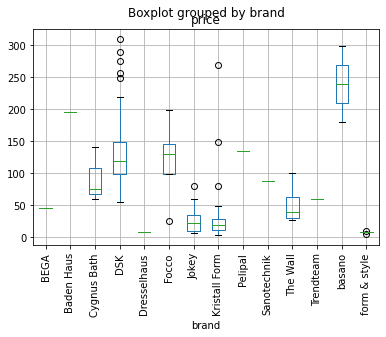

In [18]:
print("Prices for "  + scrap__spider_marketplace + " (all countries with € as currency)"  + " >> " + category + " and is available in shop.")

boxplot = db_snapshot[(db_snapshot['category']==category) & (db_snapshot['currency']=="€") &
                 (db_snapshot['scrap__spider_marketplace']==scrap__spider_marketplace) &
                 (db_snapshot['isAvailableInShop']==True)].boxplot(column=["price"], by="brand", rot=90 )

In [19]:
print(scrap__spider_marketplace + " (all countries)"  + " >> " + category + " and is available in shop.")

table = pd.pivot_table(db_snapshot[(db_snapshot['category']==category) &
                 (db_snapshot['scrap__spider_marketplace']==scrap__spider_marketplace) &
                 (db_snapshot['isAvailableInShop']==True)],
                        values=['sku'], index=['brand'],
                        columns=['scrap__spider_marketplace', 'scrap__spider_country'], 
                        aggfunc={  'sku': 'count' }, fill_value=0, margins=True
                        )
table

hornbach (all countries) >> Bathroom mirror and is available in shop.


sku                             
scrap__spider_marketplace hornbach                          All
scrap__spider_country           at  cz  de  nl  ro  se  sk     
brand                                                          
BEGA                             0   0   1   0   0   0   0    1
Baden Haus                       0   0   0   0   0   0   1    1
Cersanit                         0   0   0   0   1   0   0    1
Cygnus Bath                      0   0   3   0   0   0   0    3
DSK                             12  10  14  19   4  10   9   78
Dresselhaus                      0   0   0   1   0   1   0    2
FACKELMANN                       0   0   0   0   2   0   0    2
Focco                            2   7   3   6   2   4   6   30
IDO                              0   0   0   0   0   1   0    1
Jokey                            2   0  10   0   2   0   0   14
Kristall Form                   19   0   2  25  16  22   0   84
Pelipal                          0   0   1   0   0   2   0    3
Sanotechnik                      1   0   0   0   7   0   0    8
Savini                           0   0   0   0   3   0   0    3
The Wall                         0   0   4   0   0   0   0    4
Trendteam                        0   0   1   0   0   0   0    1
Westerberg                       0   0   0   0   0   1   0    1
basano                           1   0   1   0   0   0   0    2
form & style                     1   1   1   2   1   1   1    8
All                             38  18  41  53  38  42  17  247

In [22]:
print("Brand reputation " + scrap__spider_marketplace + " (all countries)"  + " >> " + category + " and is available in shop.")

table = pd.pivot_table(db_snapshot[(db_snapshot['category']==category) &
                 (db_snapshot['scrap__spider_marketplace']==scrap__spider_marketplace) &
                 (db_snapshot['reviews_count']>0)],
                        values=['sku', 'reviews_count', 'reviews_rating' ], index=['category', 'brand'],
                        columns=['scrap__spider_marketplace', 'scrap__spider_country'], 
                        aggfunc={  'sku': 'count', 'reviews_count':np.sum, 'reviews_rating': np.mean }, fill_value=0, margins=True
                        )
table

Brand reputation hornbach (all countries) >> Bathroom mirror and is available in shop.


reviews_count                  ...      sku               
scrap__spider_marketplace          hornbach                  ... hornbach            All
scrap__spider_country                    at  cz  de  nl  ro  ...       nl  ro se sk     
category        brand                                        ...                        
Bathroom mirror Baden Haus                1   0  12   0   0  ...        0   0  1  0    4
                Cygnus Bath               0   0   2   0   0  ...        0   0  0  0    1
                DSK                       3   5  24   7   7  ...        6   2  2  1   27
                FACKELMANN                0   0  10   0   2  ...        0   2  0  0    7
                Focco                     0   5   7   4  13  ...        2   1  1  1    8
                IDO                       0   0   0   0   0  ...        0   0  1  0    1
                Intedoor                  0   1   0   0   0  ...        0   0  0  0    1
                Jokey                     0   0  12   0   0  ...        0   0  0  0    3
                Kristall Form             8   0  14  16   9  ...       10   4  1  0   30
                Pelipal                   0   3  10   0   4  ...        0   1  0  0    8
                Sanotechnik               2   0   0   0   9  ...        0   5  0  0    6
                Sanox                     0   0   1   0   0  ...        0   0  0  0    1
                The Wall                  1   0   5   0   0  ...        0   0  0  0    5
                form & style              0   1   2   0   2  ...        0   1  0  0    3
All                                      15  15  99  27  46  ...       18  16  6  2  105

[15 rows x 24 columns]

In [23]:
print("Brand reputation per country")

table = pd.pivot_table(db[db["reviews_count"]>0], 
                        values=[ 'reviews_rating', 'reviews_count'], index=["category", "brand"],
                        columns=['scrap__spider_marketplace', 'scrap__spider_country'], 
                        aggfunc={   'reviews_rating': np.mean, 'reviews_count':np.sum }, margins=True
                        )
table

Brand reputation per country


reviews_count        ... reviews_rating          
scrap__spider_marketplace            hornbach        ...       hornbach       All
scrap__spider_country                      at    ch  ...             sk          
category          brand                              ...                         
Bathroom lighting AEG                     NaN   NaN  ...            NaN  4.666667
                  Briloner                NaN   NaN  ...            NaN  3.666667
                  FACKELMANN              NaN   NaN  ...            NaN  3.000000
                  FLAIR                   NaN   NaN  ...            NaN  3.833333
                  Focco                   NaN   NaN  ...            NaN  2.833333
                  Paulmann                NaN   NaN  ...            NaN  4.000000
                  Pelipal                 NaN   NaN  ...            NaN  3.833333
                  TIGER                   NaN   NaN  ...            NaN  4.750000
                  basano                  NaN   NaN  ...            NaN  4.500000
Bathroom mirror   FACKELMANN              NaN   2.0  ...            NaN  4.125000
                  Focco                   NaN   NaN  ...       5.000000  4.000000
                  Pelipal                 NaN   1.0  ...            NaN  3.647059
                  basano                  NaN   1.0  ...            NaN  5.000000
                  Baden Haus              2.0   NaN  ...            NaN  4.000000
                  Cygnus Bath             NaN   NaN  ...            NaN  1.500000
                  DIAQUA                  NaN   1.0  ...            NaN  4.000000
                  DSK                     6.0   1.0  ...       1.000000  3.727273
                  IDO                     NaN   NaN  ...            NaN  1.000000
                  Intedoor                NaN   NaN  ...            NaN  5.000000
                  Jokey                   NaN   NaN  ...            NaN  5.000000
                  Kristall Form          16.0   5.0  ...            NaN  4.046154
                  Sanotechnik             4.0   NaN  ...            NaN  3.000000
                  Sanox                   NaN   1.0  ...            NaN  3.666667
                  The Wall                2.0   NaN  ...            NaN  2.800000
                  form & style            NaN   2.0  ...            NaN  4.625000
Cosmetic mirror   basano                  NaN   NaN  ...            NaN  2.000000
                  form & style            NaN   NaN  ...            NaN  4.200000
Mirror cabinet    FACKELMANN             14.0   NaN  ...            NaN  4.700000
                  Pelipal                74.0   8.0  ...            NaN  4.034091
                  TIGER                   NaN   NaN  ...            NaN  3.000000
                  basano                  2.0   NaN  ...            NaN  3.000000
                  Baden Haus              2.0   5.0  ...            NaN  3.743590
                  DSK                     NaN   NaN  ...            NaN  4.000000
                  Jokey                   NaN   NaN  ...       5.000000  3.500000
                  Sanotechnik             4.0   NaN  ...            NaN  4.500000
                  Sanox                   NaN   1.0  ...            NaN  5.000000
                  form & style            NaN   NaN  ...            NaN  5.000000
                  Held Möbel              2.0   NaN  ...            NaN  5.000000
                  Savini                  NaN   NaN  ...            NaN  3.166667
                  Sieper                  NaN   NaN  ...            NaN  4.250000
                  Trendteam               NaN   NaN  ...            NaN  4.750000
All                                     128.0  28.0  ...       3.666667  3.978916

[42 rows x 18 columns]

In [24]:
print("Available SKU's by category and brand for each marketplace and country.")

table = pd.pivot_table(db_snapshot, 
                        values=['sku'], index=[ 'category', 'brand'],
                        columns=[ 'scrap__spider_marketplace', 'scrap__spider_country', ], 
                        aggfunc={  'sku': 'count' }, fill_value=0, margins=True
                        )
table

Available SKU's by category and brand for each marketplace and country.


sku                                    
scrap__spider_marketplace         hornbach                                 All
scrap__spider_country                   at   cz    de  nl   ro   se   sk      
category          brand                                                       
Bathroom lighting AEG                    0    0     8   0    0    0    0     8
                  Baden Haus             0    0     6   0    0    1    0     7
                  Brilliant              0    0     1   0    0    1    0     2
                  Briloner               0    0    44   0    0   11    0    55
                  Cedam                  0    0     3   0    0    0    0     3
...                                    ...  ...   ...  ..  ...  ...  ...   ...
Mirror cabinet    Villeroy & Boch        1    0     2   0    0    0    0     3
                  form & style           0    1     0   0    1    0    1     3
                  Held Möbel            12    0     0   0    0    0    0    12
                  Sieper                 0    1     0   0    6    0    1     8
All                                   1149  266  1495  85  138  201  257  3591

[101 rows x 8 columns]

## Product Reviews Intelligence

In [25]:
#prepare data
db_reviews_snapshot = DB.flatten_product_reviews(db_snapshot)

db_reviews_snapshot['review_date'] = pd.to_datetime(db_reviews_snapshot["review_date"])
db_reviews_snapshot

,review_date,review_heading,review_rating,review_body,sku,title,category,brand,isStoreBrand,price,reviews_count,reviews_rating,scrap__spider_marketplace,scrap__spider_country,product_url
0,2021-08-17,Rost am Rand der Spiegel,1,Ich habe der Spiegel vor 1 1/2 Jahre gekauft ...,6233068,LED Badspiegel Tessin mit Kosmetikspiegel 100 ...,Bathroom mirror,Baden Haus,False,419,11,4,hornbach,de,https://www.hornbach.de/shop/LED-Badspiegel-Te...
1,2020-12-16,Ist alles super gelaufen,5,Sieht toll aus,6233068,LED Badspiegel Tessin mit Kosmetikspiegel 100 ...,Bathroom mirror,Baden Haus,False,419,11,4,hornbach,de,https://www.hornbach.de/shop/LED-Badspiegel-Te...
2,2020-10-23,Schöne Spiegel,5,"Sehr schöne optik, allerdings LED Beleuchtung ...",6233068,LED Badspiegel Tessin mit Kosmetikspiegel 100 ...,Bathroom mirror,Baden Haus,False,419,11,4,hornbach,de,https://www.hornbach.de/shop/LED-Badspiegel-Te...
3,2020-10-11,Absolut Top,5,"Perfekter Spiegel ,\nDer Spiegel ist ein absol...",6233068,LED Badspiegel Tessin mit Kosmetikspiegel 100 ...,Bathroom mirror,Baden Haus,False,419,11,4,hornbach,de,https://www.hornbach.de/shop/LED-Badspiegel-Te...
4,2020-10-07,Axenti,1,"Der Spiegel ist schön, kann man nicht dazu sag...",6233068,LED Badspiegel Tessin mit Kosmetikspiegel 100 ...,Bathroom mirror,Baden Haus,False,419,11,4,hornbach,de,https://www.hornbach.de/shop/LED-Badspiegel-Te...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,2021-06-03,"Prima, maar verwacht geen wonderen",3,"Dit product is van HDF, wat slecht bestand is ...",6712533,PELIPAL Wastafelonderkast Heidelberg 62x60 cm ...,NaN,Pelipal,False,79,6,3,hornbach,nl,https://www.hornbach.nl/shop/PELIPAL-Wastafelo...
1431,2021-02-01,Planken en of glasplaten,3,Ik heb vandaag 2 meubels gekocht ziet er prima...,6712533,PELIPAL Wastafelonderkast Heidelberg 62x60 cm ...,NaN,Pelipal,False,79,6,3,hornbach,nl,https://www.hornbach.nl/shop/PELIPAL-Wastafelo...
1432,2020-12-04,Onderkast Heidelbeeg,1,912 heidelberg watafel kast ..echte slechte kw...,6712533,PELIPAL Wastafelonderkast Heidelberg 62x60 cm ...,NaN,Pelipal,False,79,6,3,hornbach,nl,https://www.hornbach.nl/shop/PELIPAL-Wastafelo...
1433,2020-02-20,Watafelonderkast,4,Redelijke onderkast. Beschrijving is overzicht...,6712533,PELIPAL Wastafelonderkast Heidelberg 62x60 cm ...,NaN,Pelipal,False,79,6,3,hornbach,nl,https://www.hornbach.nl/shop/PELIPAL-Wastafelo...


Bathroom mirror for hornbach.de


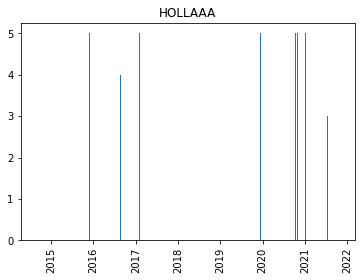

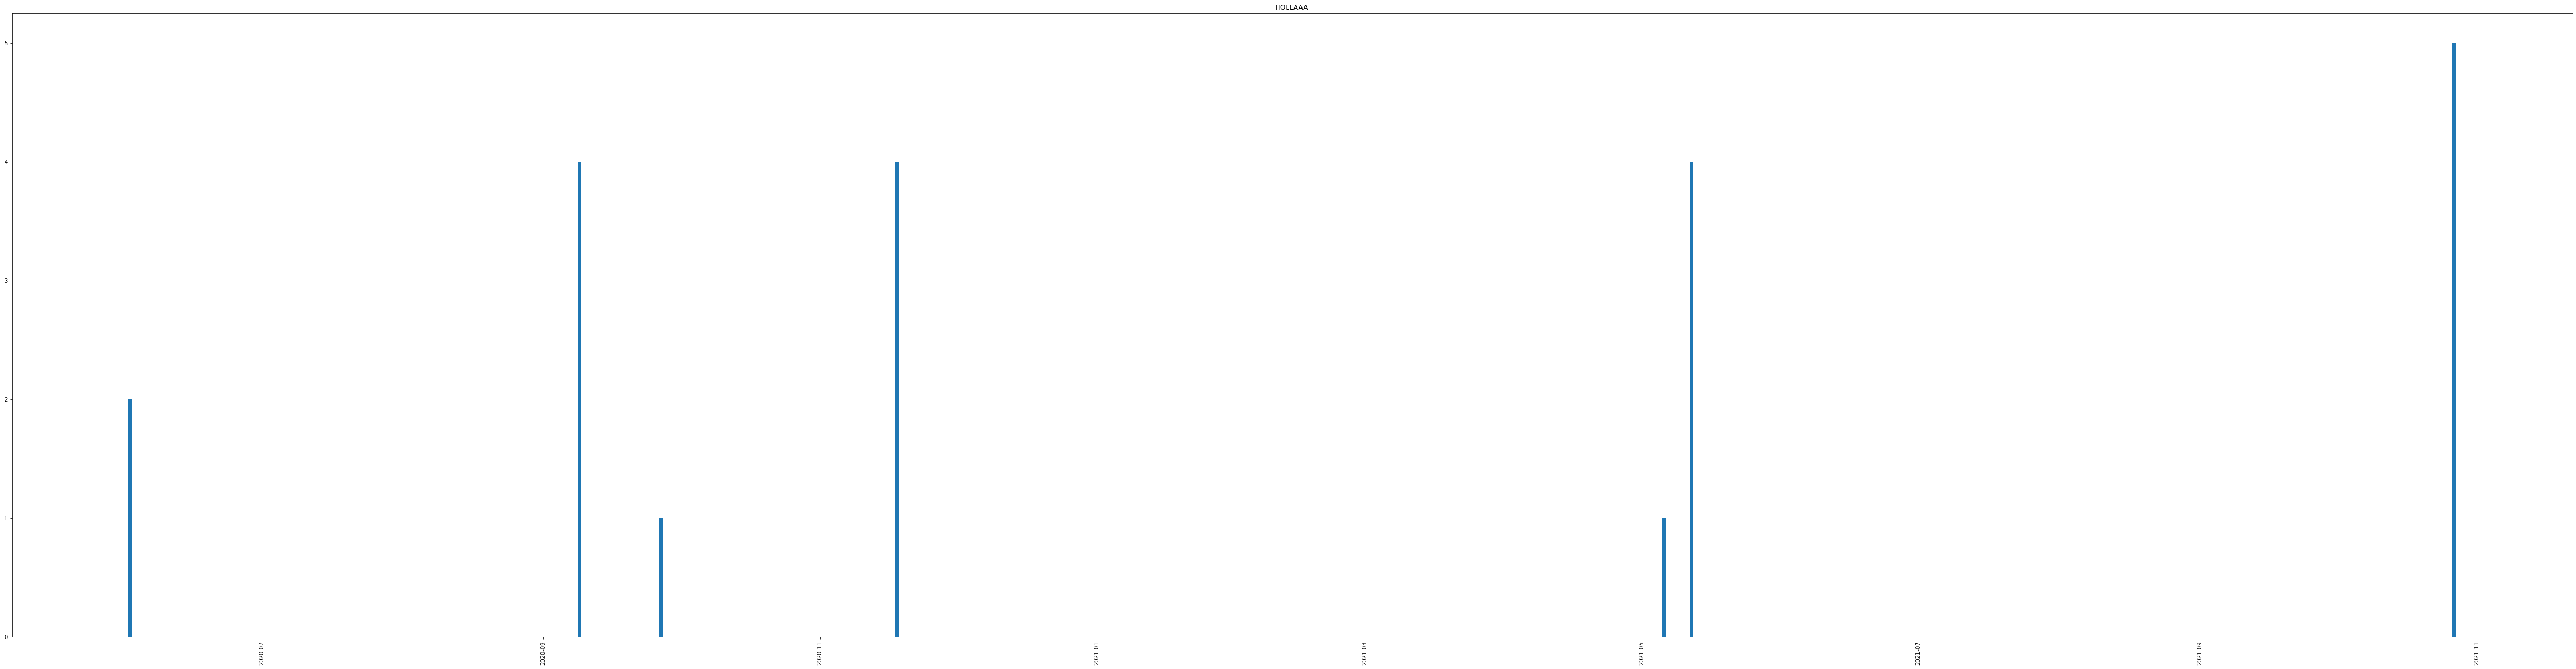

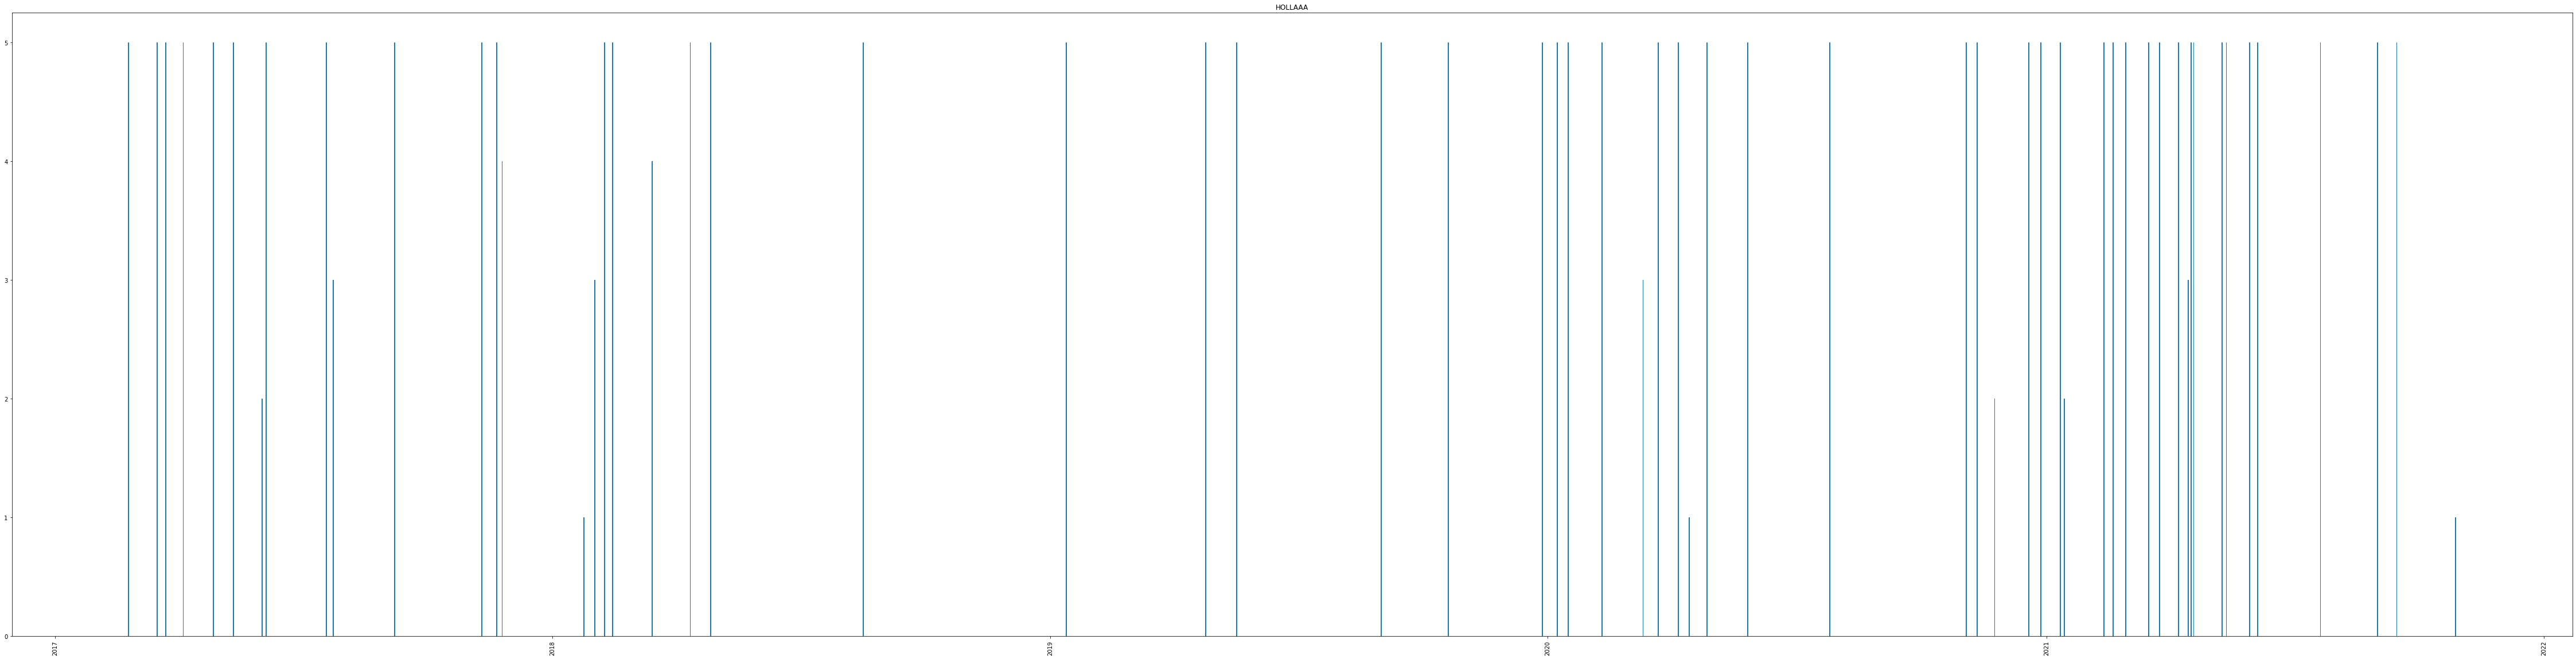

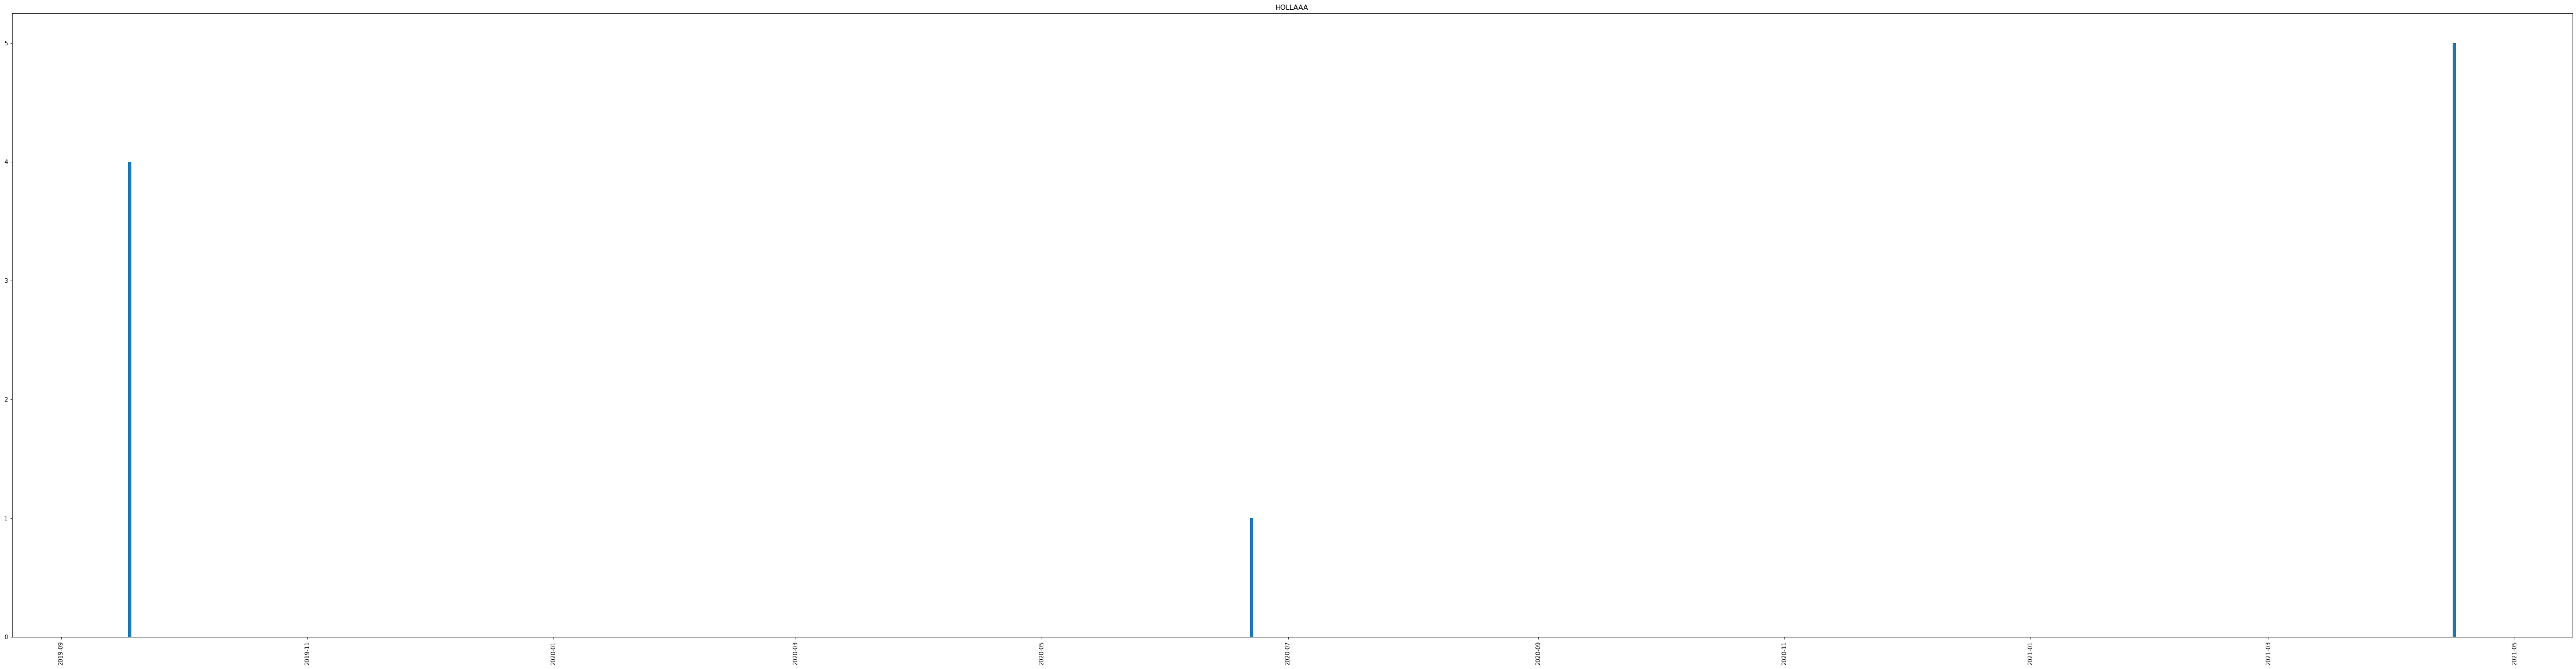

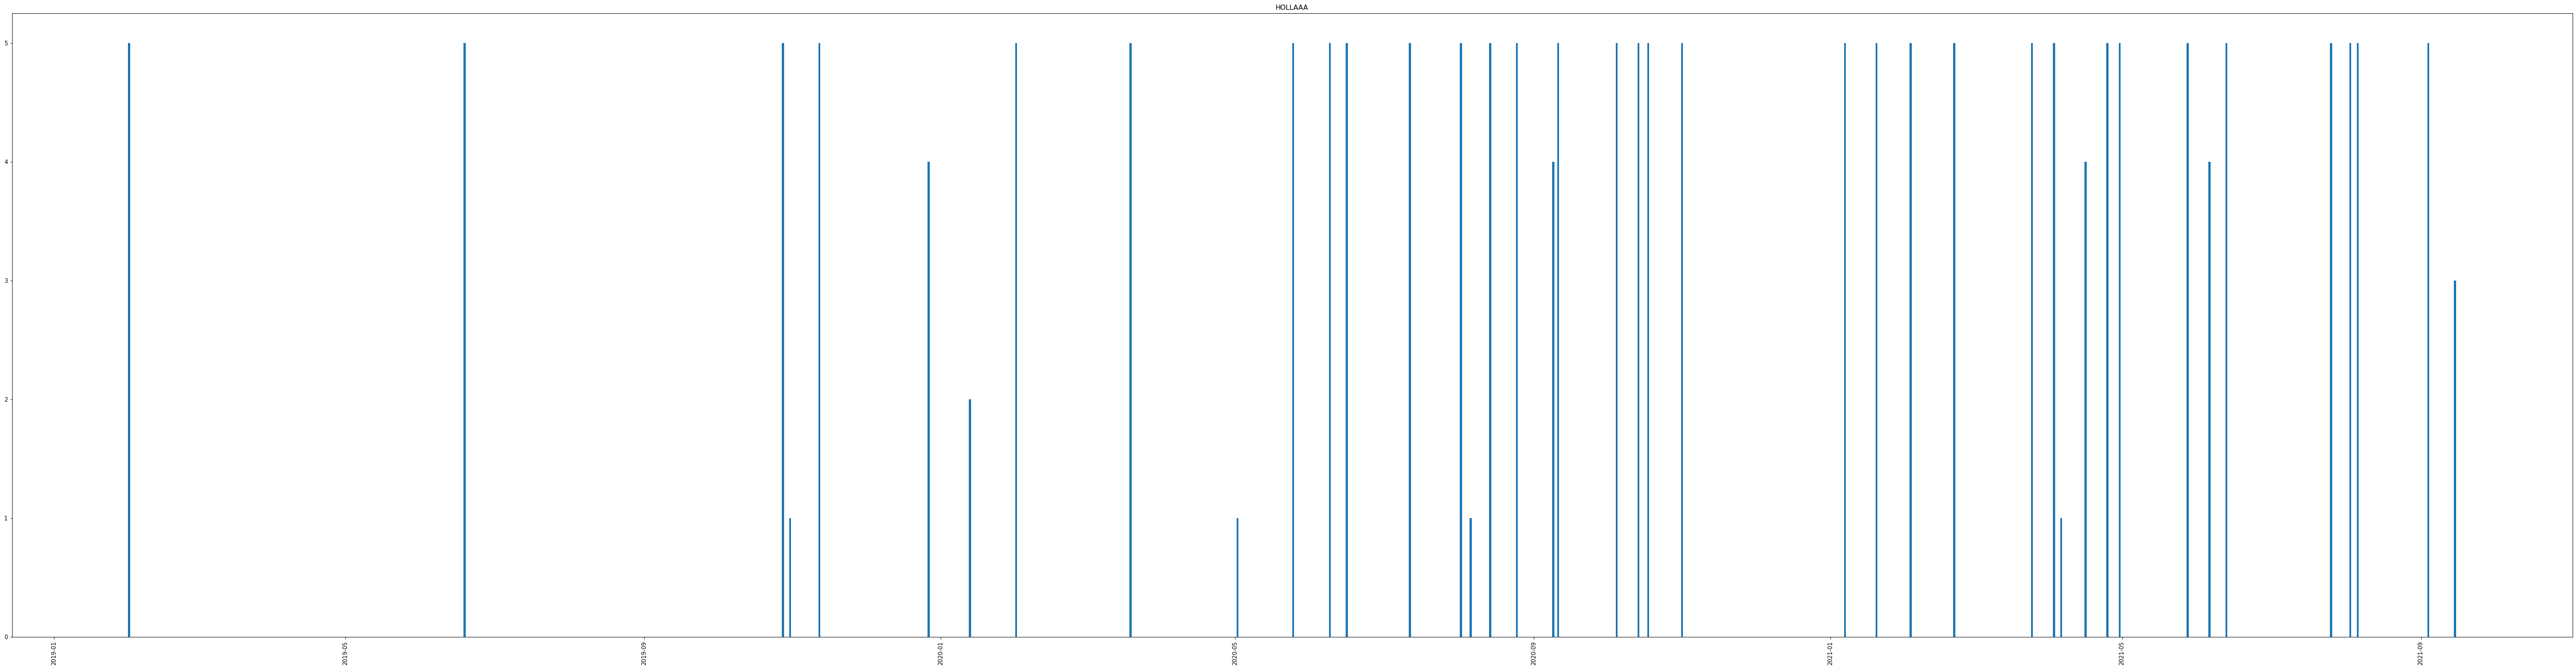

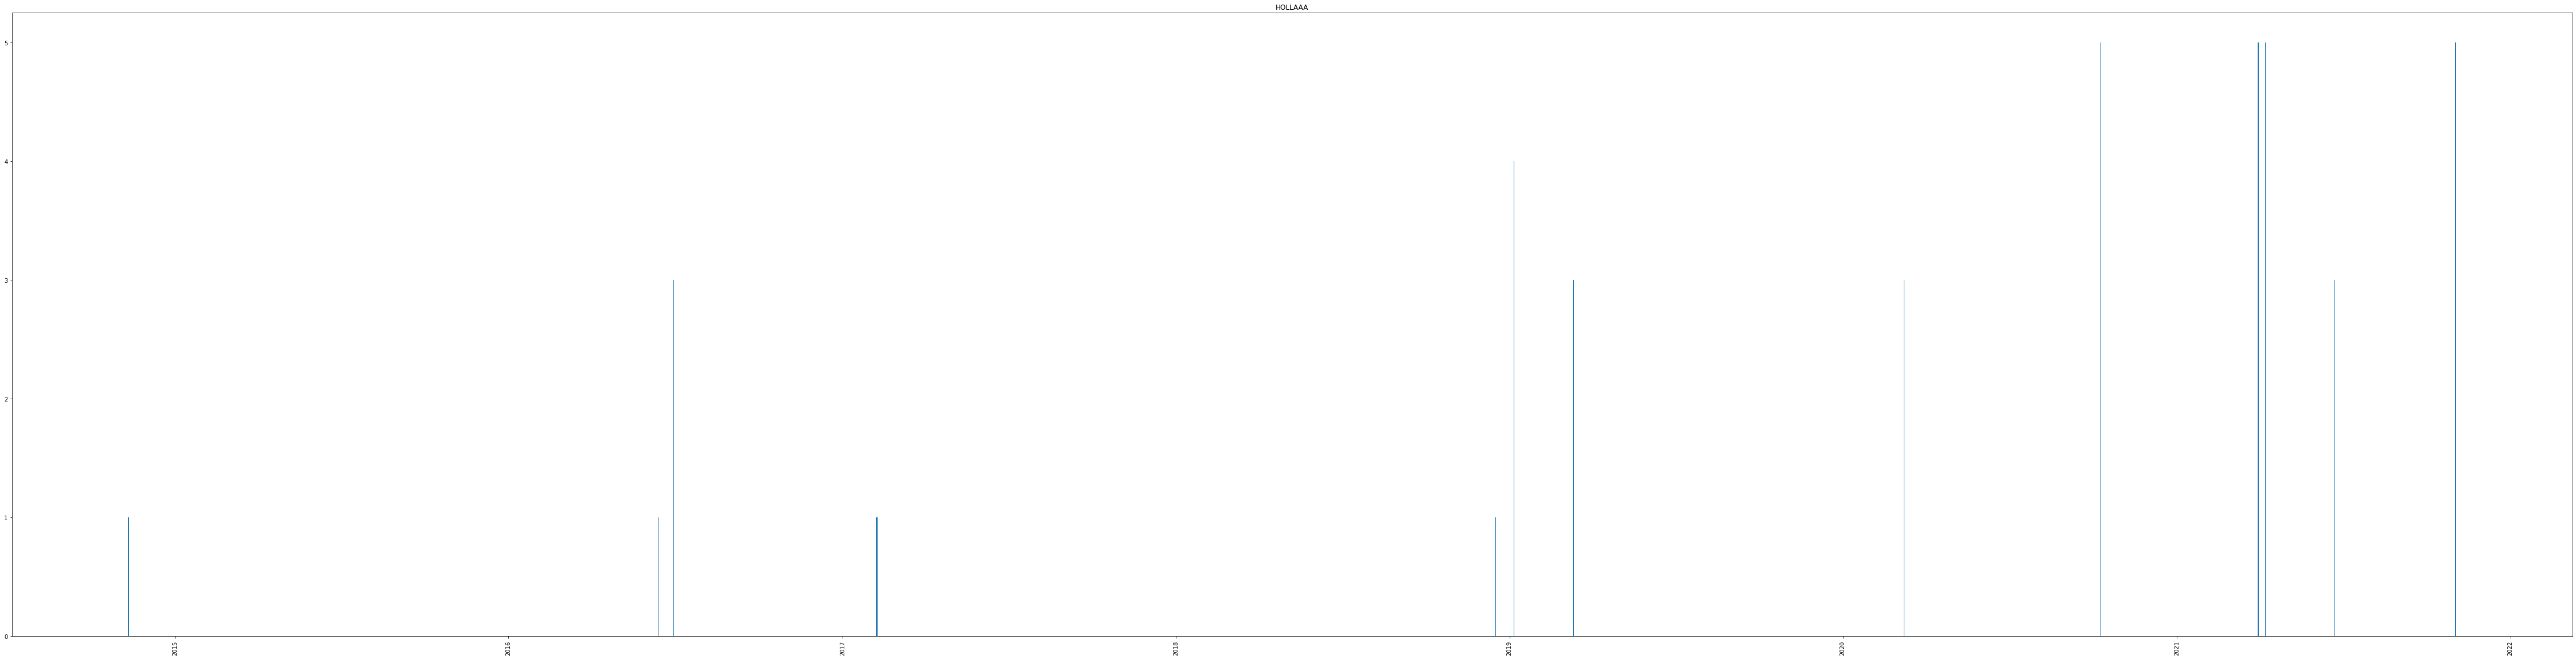

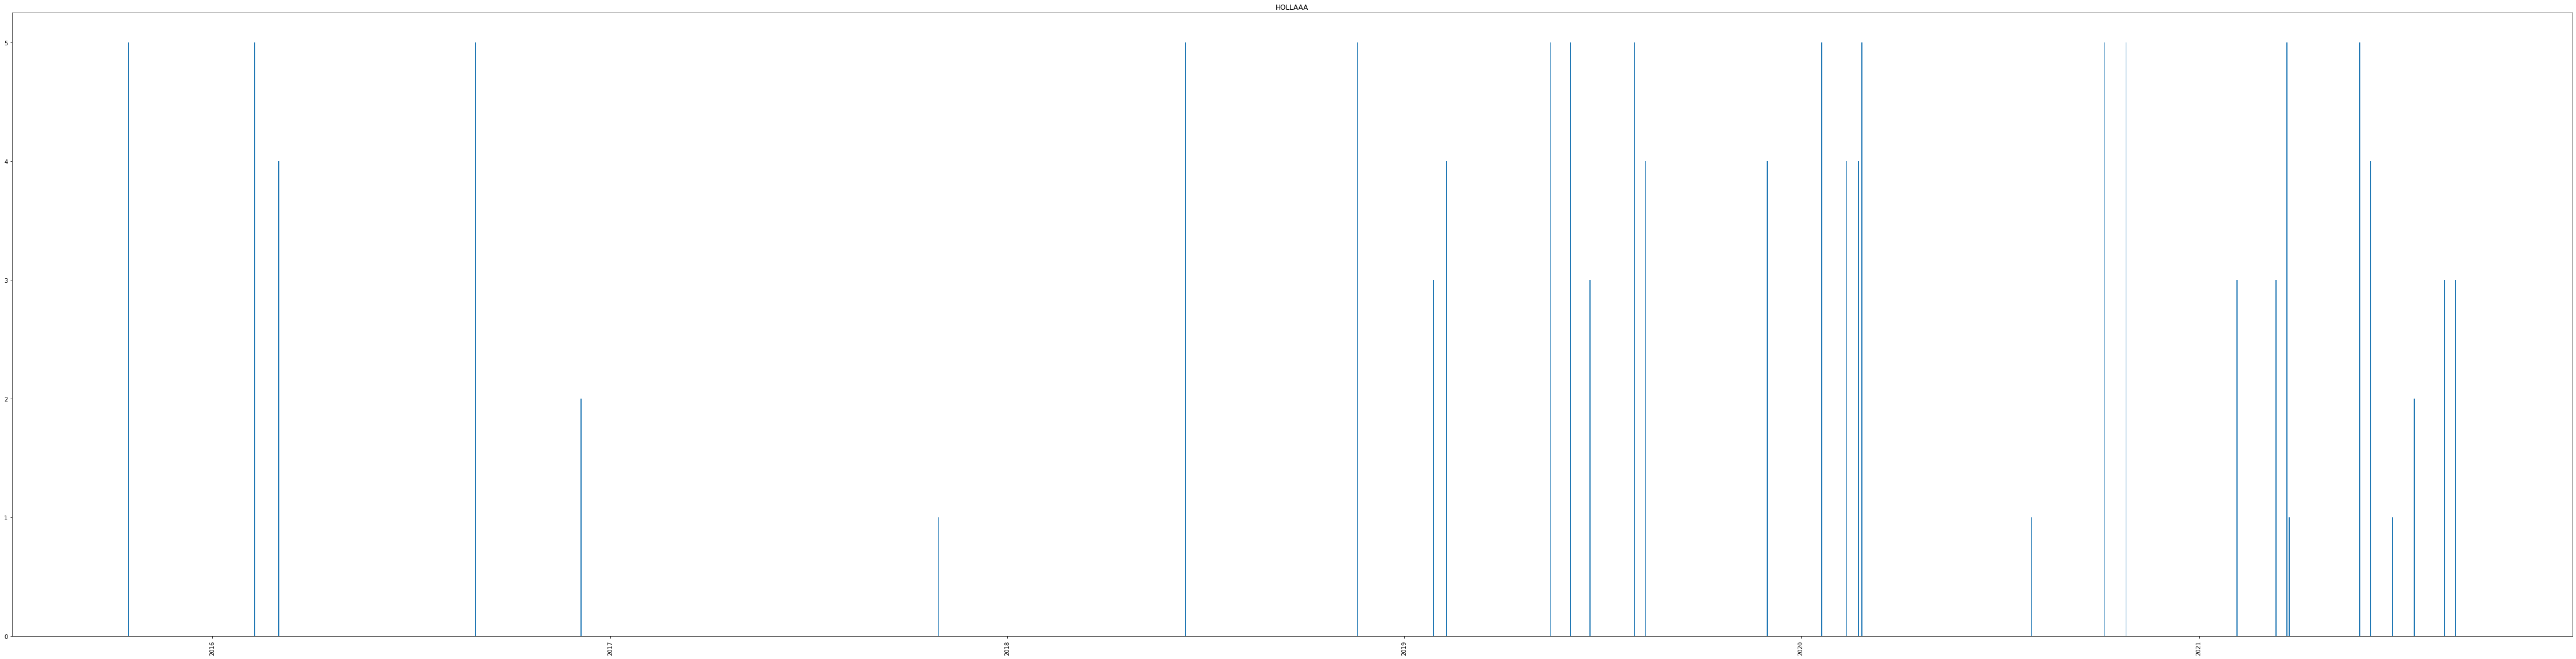

In [26]:
# importing the required module
import matplotlib.pyplot as plt
 
print(category + " for " + scrap__spider_marketplace + "."  + scrap__spider_country)

i=211
for country in db_reviews_snapshot['scrap__spider_country'].unique():
  db1 = db_reviews_snapshot[(db_reviews_snapshot['category']==category) &
                 (db_reviews_snapshot['scrap__spider_marketplace']==scrap__spider_marketplace) & 
                 (db_reviews_snapshot['scrap__spider_country']==country)]
  i=i+1  
  plt.figure()
  plt.rcParams["figure.figsize"] = (80,20)
  plt.subplot( )
  plt.title("HOLLAAA")
  plt.xticks(rotation=90)
  plt.bar(db1['review_date'], db1['review_rating'])
